Deliverable 2: Web scraping mars temperature data

In [1]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager


Pandas read format

In [2]:
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

In [3]:
# Read table(s) from the website as a Pandas DataFrame
pd_mars_df = pd.read_html(url)[0]

In [4]:
# Convert data to the appropriate data type
pd_mars_df['terrestrial_date'] = pd.to_datetime(pd_mars_df['terrestrial_date'])
pd_mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


Splinter and bs4

In [5]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [6]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [7]:
# Read DataFrame

df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [8]:
# Convert to Pandas DataFrame

mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
# Examine data types of DataFrame columns.

mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [10]:
# Cast the data to the appropriate data types

mars_df[["terrestrial_date"]] = mars_df[["terrestrial_date"]].apply(pd.to_datetime)
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [11]:
# How many months exist on Mars?

print(mars_df["month"].max())

12


In [12]:
# Days worth of data that exist in the dataset

print(mars_df["sol"].max()-mars_df["sol"].min())

1967


In [13]:
# Average minimum daily temperatures

min_temp_avg_month = mars_df.groupby(["month"]).mean()["min_temp"]
min_temp_avg_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

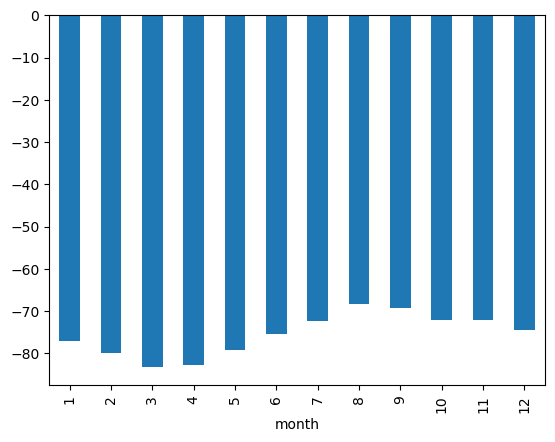

In [14]:
# Plot the results

min_temp_avg_month.plot(y="month", kind='bar')
plt.show()

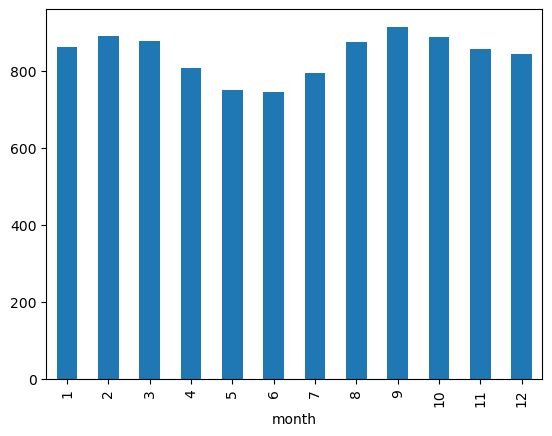

In [15]:
# Which months have the lowest and the highest atmospheric pressure on Mars?
# Plot the results as a bar chart.

avg_pressure_month = mars_df.groupby(["month"]).mean()["pressure"]
avg_pressure_month.plot(y="pressure", kind='bar')
plt.show()

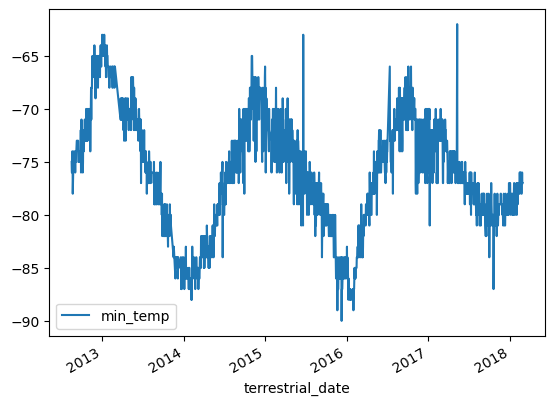

In [19]:
# How many terrestrial days exist in a year?
# Plot the results

mars_df.plot(x="terrestrial_date", y="min_temp")
plt.show()

In [17]:
# 11. Export the DataFrame to a CSV file.

mars_df.to_csv("marsinfo.csv")

In [20]:
browser.quit()